### Processing r/nintendoswitch data

In [1]:
import re

import pandas as pd
import nltk

In [1]:
import os
print(os.listdir('./data'))

['processed', 'raw']


In [2]:
# read in comments
comments = pd.read_csv('./data/raw/nintendoswitch/Comments.csv')

In [3]:
sample = comments.Reply.iloc[9]
sample

'Wow that’s lucky! Are you absolutely sure you won it!?!?'

In [4]:
re.sub(r'\(?http\S+', '', sample)

'Wow that’s lucky! Are you absolutely sure you won it!?!?'

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['Wow',
 'that',
 '’',
 's',
 'lucky',
 '!',
 'Are',
 'you',
 'absolutely',
 'sure',
 'you',
 'won',
 'it',
 '!',
 '?',
 '!',
 '?']

In [7]:
' '.join(word_tokenized)

'Wow that ’ s lucky ! Are you absolutely sure you won it ! ? ! ?'

**Bigrams**

In [8]:
from nltk.collocations import *

In [9]:
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [10]:
all_text = nltk.word_tokenize(all_text)

In [11]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('Chrono', 'Trigger'), ('Mountain', 'Dew'), ('Resident', 'Evil'), ('Pocket', 'Camp'), ('Final', 'Fantasy'), ('Rogue', 'Squadron'), ('Harvest', 'Moon'), ('Radiant', 'Dawn'), ('Crystal', 'Chronicles'), ('twilight', 'princess')]


In [12]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [13]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

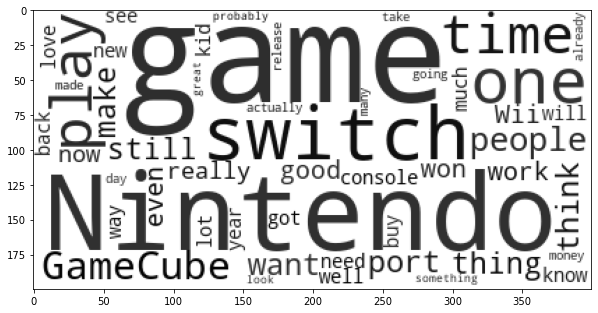

In [14]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants

sid = SentimentIntensityAnalyzer()

In [17]:
comments


,Reply,Upvote,Time,Key
0,Whoaaa! Your kid must be so excited,3072,2019-10-18 06:01:58,0
1,"Nice, grats! Back in 1999 I actually won a Nin...",9307,2019-10-18 06:04:13,0
2,Huh. People actually win from these things?,4663,2019-10-18 06:01:10,0
3,Dang! Congats! What games?,920,2019-10-18 06:11:15,0
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0
...,...,...,...,...
101821,I thought you meant more like this:\n\nhttps:/...,1,2019-07-20 13:54:00,39
101822,"Sure, but I'm not a speedrunner, and neither a...",1,2019-07-21 05:32:58,39
101823,Ok. I haven't played any of those games except...,2,2019-07-20 11:41:54,39
101824,It's really funny you mention Celeste. I trie...,1,2019-07-20 12:04:45,39


In [18]:
sample = comments.Reply.iloc[101821]
sample

'I thought you meant more like this:\n\nhttps://cdn.gamerant.com/wp-content/uploads/nintendo-switch-gamecube-skin-1.jpg.optimal.jpg'

In [19]:
re.sub(r'\(?http\S+', '', sample)

'I thought you meant more like this:\n\n'

In [20]:
comments.Reply = comments['Reply'].astype(str)


### Sentiment analysis with Vader

In [21]:
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
comments.Reply = comments.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

Removing links and tokenizing comments 

In [46]:
comments_vader = comments.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [47]:
comments_vader.shape

(101826, 4)

In [48]:
comments_vader = pd.concat([comments, comments_vader], axis=1)
comments_vader

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,Whoaaa ! Your kid must be so excited,3072,2019-10-18 06:01:58,0,0.000,0.638,0.362,0.5280
1,"Nice , grats ! Back in 1999 I actually won a N...",9307,2019-10-18 06:04:13,0,0.000,0.693,0.307,0.7955
2,Huh . People actually win from these things ?,4663,2019-10-18 06:01:10,0,0.000,0.612,0.388,0.5859
3,Dang ! Congats ! What games ?,920,2019-10-18 06:11:15,0,0.000,1.000,0.000,0.0000
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0,0.097,0.525,0.379,0.7896
...,...,...,...,...,...,...,...,...
101821,I thought you meant more like this :,1,2019-07-20 13:54:00,39,0.000,0.642,0.358,0.4201
101822,"Sure , but I 'm not a speedrunner , and neithe...",1,2019-07-21 05:32:58,39,0.000,0.920,0.080,0.1655
101823,Ok . I have n't played any of those games exce...,2,2019-07-20 11:41:54,39,0.030,0.848,0.122,0.6327
101824,It 's really funny you mention Celeste . I tri...,1,2019-07-20 12:04:45,39,0.000,0.896,0.104,0.7485


### Sentiment analysis with Textblob

In [24]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [49]:
comments_textblob = comments.Reply.apply(lambda x: pd.Series({'Classification':tba(x).sentiment[0],
                                                                        'positive':tba(x).sentiment[1],
                                                                        'negative':tba(x).sentiment[2]}))

In [50]:
comments_textblob = pd.concat([comments, comments_textblob], axis=1)
comments_textblob

,Reply,Upvote,Time,Key,Classification,positive,negative
0,Whoaaa ! Your kid must be so excited,3072,2019-10-18 06:01:58,0,pos,0.652933,0.347067
1,"Nice , grats ! Back in 1999 I actually won a N...",9307,2019-10-18 06:04:13,0,neg,0.063053,0.936947
2,Huh . People actually win from these things ?,4663,2019-10-18 06:01:10,0,neg,0.293430,0.706570
3,Dang ! Congats ! What games ?,920,2019-10-18 06:11:15,0,pos,0.599253,0.400747
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0,neg,0.226188,0.773812
...,...,...,...,...,...,...,...
101821,I thought you meant more like this :,1,2019-07-20 13:54:00,39,neg,0.333497,0.666503
101822,"Sure , but I 'm not a speedrunner , and neithe...",1,2019-07-21 05:32:58,39,neg,0.381727,0.618273
101823,Ok . I have n't played any of those games exce...,2,2019-07-20 11:41:54,39,pos,0.530976,0.469024
101824,It 's really funny you mention Celeste . I tri...,1,2019-07-20 12:04:45,39,pos,0.853542,0.146458


In [53]:
comments_textblob.to_csv('./data/processed/nintendoswitch/comments-textblob.csv', index=False)

In [54]:
comments_vader.to_csv('./data/processed/nintendoswitch/comments-vader.csv', index=False)

### Processing r/teslamotors data

In [56]:
comments = pd.read_csv('./data/raw/teslamotors/comments-raw.csv')

### Vader

In [58]:
# convert Reply column to string
comments.Reply = comments['Reply'].astype(str)

In [59]:
# tokenize and remove links
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
comments.Reply = comments.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

In [61]:
comments_vader = comments.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [62]:
comments_vader.shape

(226898, 4)

In [63]:
comments_vader = pd.concat([comments, comments_vader], axis=1)
comments_vader

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,All we need now is humanless bodies,964,2018-01-30 11:19:01,1,0.000,1.000,0.000,0.0000
1,For a moment I read careless driver . Would ha...,3982,2018-01-30 10:35:31,1,0.195,0.547,0.258,0.2023
2,Elon 's Twitter feed has been hilarious over t...,1765,2018-01-30 11:21:32,1,0.083,0.833,0.083,0.0000
3,[ deleted ],106,2018-01-30 13:39:49,1,0.000,1.000,0.000,0.0000
4,,394,2018-01-30 12:52:10,1,0.000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
226893,🤷🏻‍♂️,1,2019-04-06 03:03:01,499,0.000,1.000,0.000,0.0000
226894,If I remember correctly it is n't legal in mos...,1,2019-04-06 07:37:26,499,0.038,0.838,0.124,0.5669
226895,Your entire guess boils down to randomly guess...,2,2019-04-06 12:33:37,499,0.018,0.865,0.117,0.9033
226896,> Assuming one pack per motor You are way off ...,2,2019-04-07 11:34:52,499,0.000,0.932,0.068,0.5106


### Textblob

In [64]:
comments_textblob = comments.Reply.apply(lambda x: pd.Series({'Classification':tba(x).sentiment[0],
                                                                        'positive':tba(x).sentiment[1],
                                                                        'negative':tba(x).sentiment[2]}))

In [65]:
comments_textblob = pd.concat([comments, comments_textblob], axis=1)
comments_textblob

,Reply,Upvote,Time,Key,Classification,positive,negative
0,All we need now is humanless bodies,964,2018-01-30 11:19:01,1,pos,0.514741,0.485259
1,For a moment I read careless driver . Would ha...,3982,2018-01-30 10:35:31,1,pos,0.521948,0.478052
2,Elon 's Twitter feed has been hilarious over t...,1765,2018-01-30 11:21:32,1,pos,0.738500,0.261500
3,[ deleted ],106,2018-01-30 13:39:49,1,pos,0.678571,0.321429
4,,394,2018-01-30 12:52:10,1,pos,0.500000,0.500000
...,...,...,...,...,...,...,...
226893,🤷🏻‍♂️,1,2019-04-06 03:03:01,499,pos,0.500000,0.500000
226894,If I remember correctly it is n't legal in mos...,1,2019-04-06 07:37:26,499,pos,0.953372,0.046628
226895,Your entire guess boils down to randomly guess...,2,2019-04-06 12:33:37,499,pos,0.996385,0.003615
226896,> Assuming one pack per motor You are way off ...,2,2019-04-07 11:34:52,499,pos,0.973805,0.026195


In [66]:
comments_textblob.to_csv('./data/processed/teslamotors/comments-textblob.csv', index=False)

In [67]:
comments_vader.to_csv('./data/processed/teslamotors/comments-vader.csv', index=False)